<a href="https://colab.research.google.com/github/chamals3n4/Discrete-Mathematics-Labs/blob/main/Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adjacency List:
A: ['B']
B: ['C']
C: ['D', 'E', 'B']
D: []
E: ['D']

Adjacency Matrix:
[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 1 0 1 1]
 [0 0 0 0 0]
 [0 0 0 1 0]]


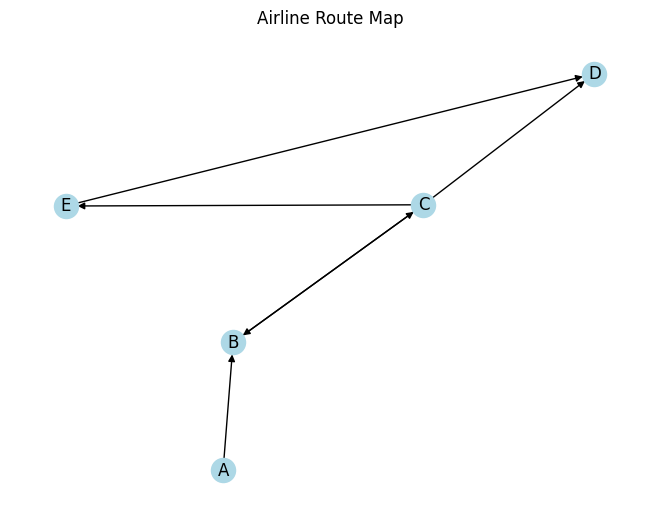

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
edges = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('E', 'D'), ('C', 'B')]
G.add_edges_from(edges)

print("Adjacency List:")
for node in G.nodes():
    print(f"{node}: {list(G.adj[node])}")

print("\nAdjacency Matrix:")
print(nx.adjacency_matrix(G).todense())

nx.draw(G, with_labels=True, node_color='lightblue', arrows=True)
plt.title("Airline Route Map")
plt.show()


In [ ]:
print("In-Degree and Out-Degree:")
for node in G.nodes():
    print(f"{node} - In-degree: {G.in_degree(node)}, Out-degree: {G.out_degree(node)}")

print("\nSelf-loops:")
self_loops = list(nx.selfloop_edges(G))
print("None" if not self_loops else self_loops)

In-Degree and Out-Degree:
A - In-degree: 0, Out-degree: 1
B - In-degree: 2, Out-degree: 1
C - In-degree: 1, Out-degree: 3
D - In-degree: 2, Out-degree: 0
E - In-degree: 1, Out-degree: 1

Self-loops:
None


In [ ]:
print("Is D reachable from A?", nx.has_path(G, 'A', 'D'))

print("\nAll Simple Paths from A to D:")
for path in nx.all_simple_paths(G, source='A', target='D'):
    print(path)

print("\nCycles in the Graph:")
cycles = list(nx.simple_cycles(G))
print("No cycles" if not cycles else cycles)

Is D reachable from A? True

All Simple Paths from A to D:
['A', 'B', 'C', 'D']
['A', 'B', 'C', 'E', 'D']

Cycles in the Graph:
[['C', 'B']]


In [ ]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    bfs_tree = {start: []}
    parent = {start: None}

    while queue:
        node = queue.popleft()
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited and neighbor not in queue:
                queue.append(neighbor)
                parent[neighbor] = node
                if parent[neighbor] not in bfs_tree:
                    bfs_tree[parent[neighbor]] = []
                bfs_tree[parent[neighbor]].append(neighbor)
    return visited, bfs_tree

visited, bfs_tree = bfs(G.adj, 'A')
print("BFS Visit Order:", visited)
print("BFS Tree:", bfs_tree)

BFS Visit Order: {'C', 'A', 'B', 'E', 'D'}
BFS Tree: {'A': ['B'], 'B': ['C'], 'C': ['D', 'E']}


In [ ]:
time = 0
discovery = {}
finishing = {}
visited = set()

def dfs(graph, node):
    global time
    visited.add(node)
    time += 1
    discovery[node] = time
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor)
    time += 1
    finishing[node] = time

for node in G.nodes():
    if node not in visited:
        dfs(G.adj, node)

print("Discovery Times:", discovery)
print("Finishing Times:", finishing)

Discovery Times: {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 6}
Finishing Times: {'D': 5, 'E': 7, 'C': 8, 'B': 9, 'A': 10}


In [ ]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

GPA_list = [4.0, 3.8, 2.5, 3.2, 3.9, 2.0]
heapify(GPA_list, len(GPA_list), 1)
print("Heap after HEAPIFY from index 1:", GPA_list)

Heap after HEAPIFY from index 1: [4.0, 3.9, 2.5, 3.2, 3.8, 2.0]


In [ ]:
def is_full_binary_tree(tree):
    n = len(tree)
    for i in range(n):
        left = 2 * i + 1
        right = 2 * i + 2
        if left < n and tree[left] is not None or right < n and tree[right] is not None:
            if not (left < n and tree[left] is not None and right < n and tree[right] is not None):
                return False
    return True

tree = [1, 2, 3, 4, 5, None, None]
print("Is full binary tree?", is_full_binary_tree(tree))

Is full binary tree? True


In [ ]:
import heapq

GPA_list = [-4.0, -3.0, -2.5, -3.2, -3.9, -2.0]
heapq.heapify(GPA_list)
GPA_list = [-x for x in GPA_list]
print("Max-heapified GPA list:", GPA_list)

Max-heapified GPA list: [4.0, 3.9, 2.5, 3.2, 3.0, 2.0]


In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edge('A', 'B', weight=2)
G.add_edge('A', 'D', weight=6)
G.add_edge('B', 'C', weight=3)
G.add_edge('B', 'D', weight=8)
G.add_edge('C', 'D', weight=5)


mst = nx.minimum_spanning_tree(G, algorithm='prim')
print("Minimum Spanning Tree edges:")
for u, v, data in mst.edges(data=True):
    print(f"{u} - {v} \t weight: {data['weight']}")


total_weight = sum(data['weight'] for u, v, data in mst.edges(data=True))
print("Total weight of MST:", total_weight)

Minimum Spanning Tree edges:
A - B 	 weight: 2
B - C 	 weight: 3
D - C 	 weight: 5
Total weight of MST: 10


Adjacency List:
Sol: ['Alpha']
Alpha: ['Vega']
Vega: ['Sirius', 'Betelgeuse', 'Alpha']
Sirius: []
Betelgeuse: ['Sirius']

Adjacency Matrix:
[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 1 0 1 1]
 [0 0 0 0 0]
 [0 0 0 1 0]]


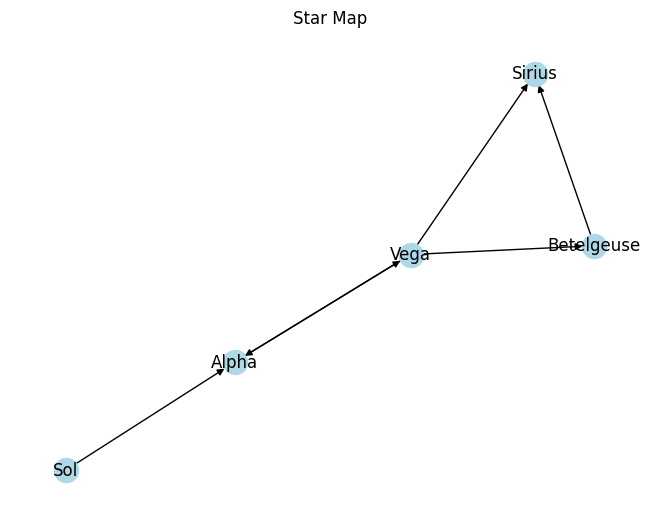

In [ ]:
import networkx as nx

DG = nx.DiGraph()
edges = [('Sol', 'Alpha'), ('Alpha', 'Vega'), ('Vega', 'Sirius'), ('Vega', 'Betelgeuse'), ('Betelgeuse', 'Sirius'), ('Vega', 'Alpha')]
DG.add_edges_from(edges)

print("Adjacency List:")
for node in DG.nodes():
    print(f"{node}: {list(DG.adj[node])}")

print("\nAdjacency Matrix:")
print(nx.adjacency_matrix(DG).todense())

nx.draw(DG, with_labels=True, node_color='lightblue', arrows=True)
plt.title("Star Map")
plt.show()

In [ ]:
print("In-Degree and Out-Degree:")
for node in DG.nodes():
    print(f"{node} - In-degree: {DG.in_degree(node)}, Out-degree: {DG.out_degree(node)}")

print("\nSelf-loops:")
self_loops = list(nx.selfloop_edges(DG))
print("None" if not self_loops else self_loops)

In-Degree and Out-Degree:
Sol - In-degree: 0, Out-degree: 1
Alpha - In-degree: 2, Out-degree: 1
Vega - In-degree: 1, Out-degree: 3
Sirius - In-degree: 2, Out-degree: 0
Betelgeuse - In-degree: 1, Out-degree: 1

Self-loops:
None


In [ ]:
print("Is Sirius reachable from Sol?", nx.has_path(DG, 'Sol', 'Sirius'))

print("\nAll Simple Paths from Sol to Sirius:")
for path in nx.all_simple_paths(DG, source='Sol', target='Sirius'):
    print(path)

print("\nCycles in the Network:")
cycles = list(nx.simple_cycles(DG))
print("No cycles" if not cycles else cycles)

Is Sirius reachable from Sol? True

All Simple Paths from Sol to Sirius:
['Sol', 'Alpha', 'Vega', 'Sirius']
['Sol', 'Alpha', 'Vega', 'Betelgeuse', 'Sirius']

Cycles in the Network:
[['Alpha', 'Vega']]


In [ ]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    bfs_tree = {start: []}
    parent = {start: None}

    while queue:
        node = queue.popleft()
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited and neighbor not in queue:
                queue.append(neighbor)
                parent[neighbor] = node
                if parent[neighbor] not in bfs_tree:
                    bfs_tree[parent[neighbor]] = []
                bfs_tree[parent[neighbor]].append(neighbor)
    return visited, bfs_tree

visited, bfs_tree = bfs(DG.adj, 'Sol')
print("BFS Visit Order:", visited)
print("BFS Tree:", bfs_tree)

BFS Visit Order: {'Sirius', 'Alpha', 'Vega', 'Sol', 'Betelgeuse'}
BFS Tree: {'Sol': ['Alpha'], 'Alpha': ['Vega'], 'Vega': ['Sirius', 'Betelgeuse']}


In [ ]:
time = 0
discovery = {}
finishing = {}
visited = set()

def dfs(graph, node):
    global time
    visited.add(node)
    time += 1
    discovery[node] = time
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor)
    time += 1
    finishing[node] = time

for node in DG.nodes():
    if node not in visited:
        dfs(DG.adj, node)

print("Discovery Times:", discovery)
print("Finishing Times:", finishing)

Discovery Times: {'Sol': 1, 'Alpha': 2, 'Vega': 3, 'Sirius': 4, 'Betelgeuse': 6}
Finishing Times: {'Sirius': 5, 'Betelgeuse': 7, 'Vega': 8, 'Alpha': 9, 'Sol': 10}


In [ ]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

GPA_list = [4.0, 3.8, 2.5, 3.2, 3.9, 2.0]
heapify(GPA_list, len(GPA_list), 1)
print("Heap after HEAPIFY from index 1:", GPA_list)

Heap after HEAPIFY from index 1: [4.0, 3.9, 2.5, 3.2, 3.8, 2.0]


In [ ]:
import heapq

ratings = [4.9, 4.7, 4.5, 3.8, 4.8]
ratings[3] = 4.0
heapq.heapify(ratings)
print("Heapified ratings:", ratings)

Heapified ratings: [4.0, 4.7, 4.5, 4.9, 4.8]


In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edge('P', 'Q', weight=4)
G.add_edge('P', 'S', weight=7)
G.add_edge('Q', 'R', weight=2)
G.add_edge('Q', 'S', weight=6)
G.add_edge('R', 'S', weight=3)

mst = nx.minimum_spanning_tree(G, algorithm='prim')
print("Minimum Spanning Tree edges:")
for u, v, data in mst.edges(data=True):
    print(f"{u} - {v} \t weight: {data['weight']}")

for u, v, data in mst.edges(data=True):
    print(f"{u} - {v} \t weight: {data['weight']}")

total_weight = sum(data['weight'] for u, v, data in mst.edges(data=True))
print("Total weight of MST:", total_weight)

Minimum Spanning Tree edges:
P - Q 	 weight: 4
Q - R 	 weight: 2
S - R 	 weight: 3
P - Q 	 weight: 4
Q - R 	 weight: 2
S - R 	 weight: 3
Total weight of MST: 9
